# Classes of Peaks based on ATAC signal

Can one define different classes of peaks based on the signal and the signal variation across cells?

Can one cluster CREs based on their ATAC-signal?

Can one visualize the behaviour of clustered regions?

Can one define cell lineage specific CRE clusters?

Are there differences between these cell-lineage specific CRE clusters? When and how long are they active?

### Import of Packages and Data Prep

In [98]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import sklearn.manifold as sklm
import os
from sklearn.decomposition import PCA
from matplotlib.colors import LogNorm
import scanpy as sc
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import anndata as ad

import functions

importlib.reload(functions)
functions.set_user('Pia')

data = functions.call_data_clean(p_threshold=1.3)
ATAC = data['ATAC_seq']
ATAC_scores = data['norm_scores']
exons = data['exons']
ATACtest = data['test1']
ATAC_dis_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ATAC_dis_annotated.csv"
ATAC_dis = pd.read_csv(ATAC_dis_path, index_col=0)
score_cols_all = list(data['norm_scores'].columns)
abgd = data['list_ATAC_Tc_ab_gd']
top2500 = data['top2500std']

In [106]:
scores_TC = ATAC_scores[abgd]

scores_df = ATAC_scores.copy()


In [107]:
scores_TC

preT.DN1.Th  preT.DN2a.Th  preT.DN2b.Th  \
ImmGenATAC1219.peakID                                                 
ImmGenATAC1219.peak_3          0.273880      0.489641      0.081759   
ImmGenATAC1219.peak_4          0.310821      0.080969      0.320926   
ImmGenATAC1219.peak_5          0.487929      0.526901      0.774242   
ImmGenATAC1219.peak_6          0.487929      0.489641      0.320926   
ImmGenATAC1219.peak_7          0.273880      0.526901      0.320926   
...                                 ...           ...           ...   
ImmGenATAC1219.peak_512589     1.065098      1.780338      1.682747   
ImmGenATAC1219.peak_512590     0.940987      1.238316      1.233688   
ImmGenATAC1219.peak_512591     1.451623      1.870062      1.478366   
ImmGenATAC1219.peak_512592     1.516312      2.008215      2.415748   
ImmGenATAC1219.peak_512595     0.880839      1.189356      0.958673   

                            preT.DN3.Th  T.DN4.Th  T.ISP.Th   T.DP.Th  \
ImmGenATAC1219.peakID                                                   
ImmGenATAC1219.peak_3          0.075144  0.248390  0.366560  0.676165   
ImmGenATAC1219.peak_4          0.075144  0.391048  0.084116  0.129760   
ImmGenATAC1219.peak_5          0.928710  0.241856  0.597463  0.288582   
ImmGenATAC1219.peak_6          0.627935  0.075437  0.360439  0.137041   
ImmGenATAC1219.peak_7          0.075144  0.391048  0.360439  0.077735   
...                                 ...       ...       ...       ...   
ImmGenATAC1219.peak_512589     2.261854  2.238800  2.936086  1.036916   
ImmGenATAC1219.peak_512590     1.650137  2.688974  1.428671  1.527188   
ImmGenATAC1219.peak_512591     1.779342  2.463233  2.090324  2.041509   
ImmGenATAC1219.peak_512592     2.713794  3.220398  3.198741  1.036916   
ImmGenATAC1219.peak_512595     0.627935  1.187508  0.854224  0.077735   

                              T.4.Th    T.8.Th  T.4.Nve.Sp  ...  \
ImmGenATAC1219.peakID                                       ...   
ImmGenATAC1219.peak_3       0.084170  0.083121    1.084888  ...   
ImmGenATAC1219.peak_4       1.120518  0.362613    0.754474  ...   
ImmGenATAC1219.peak_5       0.278584  0.368650    1.027699  ...   
ImmGenATAC1219.peak_6       0.576809  0.601781    0.503559  ...   
ImmGenATAC1219.peak_7       0.278584  0.083121    0.084687  ...   
...                              ...       ...         ...  ...   
ImmGenATAC1219.peak_512589  2.369390  1.843157    1.747534  ...   
ImmGenATAC1219.peak_512590  1.932893  1.862538    2.338039  ...   
ImmGenATAC1219.peak_512591  2.487902  1.432071    2.227251  ...   
ImmGenATAC1219.peak_512592  2.092903  1.931452    1.192886  ...   
ImmGenATAC1219.peak_512595  0.850287  1.277014    1.520390  ...   

                            Treg.4.FP3+.Nrplo.Co  Treg.4.25hi.Sp    NKT.Sp  \
ImmGenATAC1219.peakID                                                        
ImmGenATAC1219.peak_3                   0.164753        0.603273  0.384778   
ImmGenATAC1219.peak_4                   0.164753        0.603273  1.356733   
ImmGenATAC1219.peak_5                   0.164753        0.351796  0.901381   
ImmGenATAC1219.peak_6                   0.164753        0.603273  1.007028   
ImmGenATAC1219.peak_7                   0.164753        0.085088  0.901381   
...                                          ...             ...       ...   
ImmGenATAC1219.peak_512589              1.716998        1.861740  2.192088   
ImmGenATAC1219.peak_512590              2.020539        0.603273  2.192088   
ImmGenATAC1219.peak_512591              1.731404        2.448118  2.574355   
ImmGenATAC1219.peak_512592              2.227809        2.215728  2.192088   
ImmGenATAC1219.peak_512595              1.322610        0.603273  0.384778   

                            Tgd.g2+d17.24a+.Th  Tgd.g2+d17.LN  \
ImmGenATAC1219.peakID                                           
ImmGenATAC1219.peak_3                 0.361559       0.577454   
ImmGenATAC1219.peak_4                 0.361559       0.103537   
ImmGenA

### Peak Means and Variances

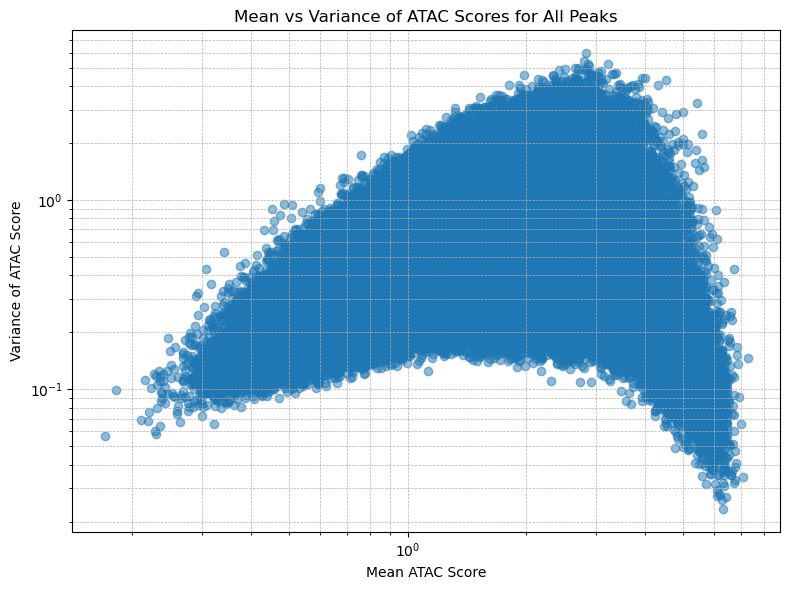

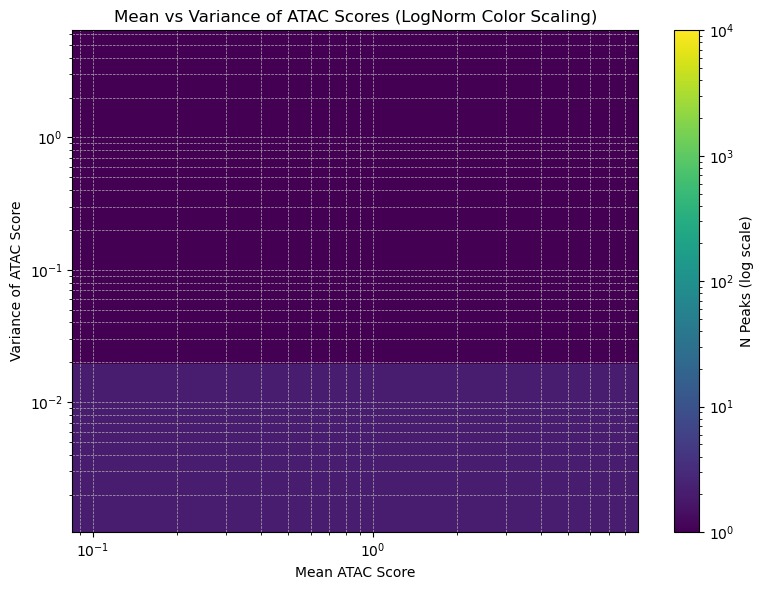

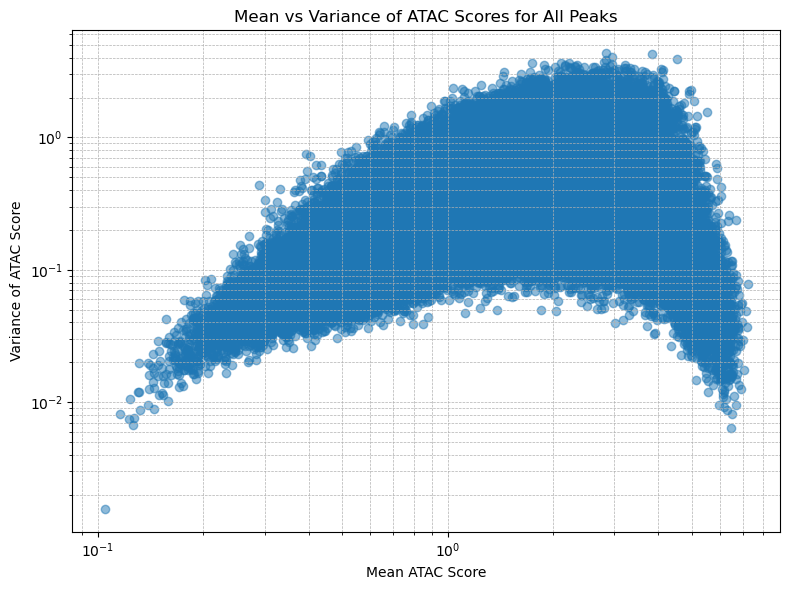

In [108]:
# calculate mean and variance of ATAC scores for each peak (and for the subset)

#full df
peak_means = scores_df.mean(axis=1)
peak_vars = scores_df.var(axis=1)

#subset df
peak_means_TC = scores_TC.mean(axis=1)
peak_vars_TC = scores_TC.var(axis=1)

# plot mean vs variance for all peaks
plt.figure(figsize=(8, 6))
plt.scatter(peak_means, peak_vars, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mean ATAC Score')
plt.ylabel('Variance of ATAC Score')
plt.title('Mean vs Variance of ATAC Scores for All Peaks')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()



plt.figure(figsize=(8, 6))

hb = plt.hexbin(
    peak_means_TC,
    peak_vars_TC,
    gridsize=75,
    cmap='viridis',
    norm=LogNorm(vmin=1, vmax=10000),  # use your actual max bin count
    mincnt=1
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mean ATAC Score')
plt.ylabel('Variance of ATAC Score')
plt.title('Mean vs Variance of ATAC Scores (LogNorm Color Scaling)')
plt.colorbar(hb, label='N Peaks (log scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(peak_means_TC, peak_vars_TC, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mean ATAC Score')
plt.ylabel('Variance of ATAC Score')
plt.title('Mean vs Variance of ATAC Scores for All Peaks')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()


### Select Peaks to analyze

high mean --> high accessibility

high variance --> important for differentiation


In [109]:
print("Peak mean min/max:", peak_means.min(), peak_means.max())
print("Peak var min/max:", peak_vars.min(), peak_vars.max())

print("Percentiles (mean):", np.percentile(peak_means, [1, 10, 50, 90, 99]))
print("Percentiles (var):", np.percentile(peak_vars, [1, 10, 50, 90, 99]))


Peak mean min/max: 0.17014838088643564 7.293943783743917
Peak var min/max: 0.023223091891373327 5.9851437237576315
Percentiles (mean): [0.42974215 0.59818999 0.97620202 2.36950581 4.73660216]
Percentiles (var): [0.13013099 0.19969008 0.35061608 0.98456873 2.20734305]


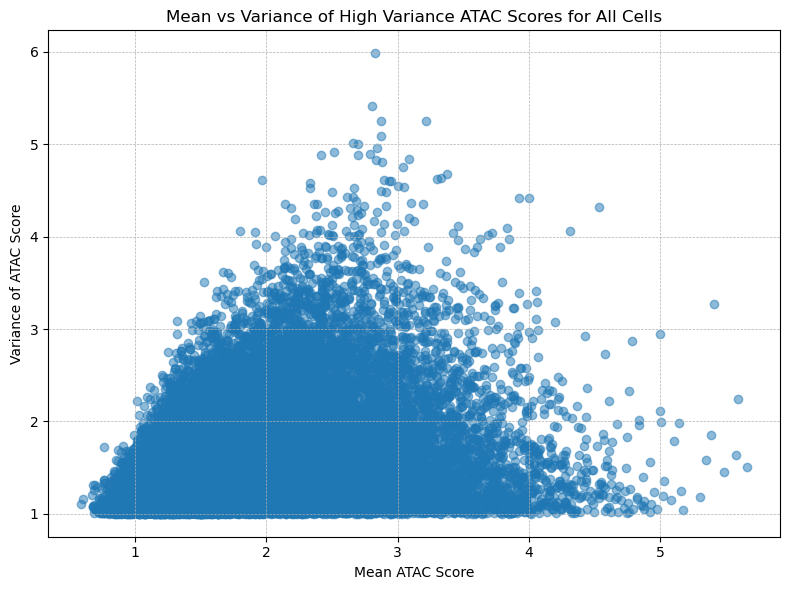

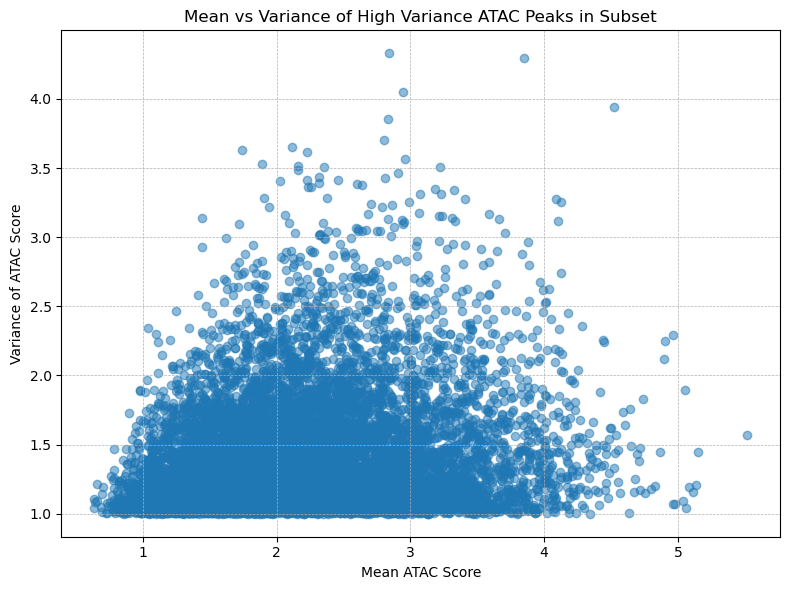

(35169, 90)
(10956, 22)


In [110]:
#extract peaks with high variance (--> more significant for differentiation)
high_variance_peaks = ATAC_scores[peak_vars > 1]

high_variance_peaks_TC = scores_TC[peak_vars_TC > 1]

# plot mean vs variance for high variance peaks
plt.figure(figsize=(8, 6))
plt.scatter(high_variance_peaks.mean(axis=1), high_variance_peaks.var(axis=1), alpha=0.5)
plt.xlabel('Mean ATAC Score')
plt.ylabel('Variance of ATAC Score')
plt.title('Mean vs Variance of High Variance ATAC Scores for All Cells')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# plot mean vs variance for high variance peaks
plt.figure(figsize=(8, 6))
plt.scatter(high_variance_peaks_TC.mean(axis=1), high_variance_peaks_TC.var(axis=1), alpha=0.5)
plt.xlabel('Mean ATAC Score')
plt.ylabel('Variance of ATAC Score')
plt.title('Mean vs Variance of High Variance ATAC Peaks in Subset')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

print(high_variance_peaks.shape)
print(high_variance_peaks_TC.shape)

## Peak Clustering

### Number of Clusters

In [111]:
# z-Scaling

# subset cells
scaled_TC = StandardScaler().fit_transform(high_variance_peaks_TC)

# all cells
scaled = StandardScaler().fit_transform(high_variance_peaks)

##### Elbow Method

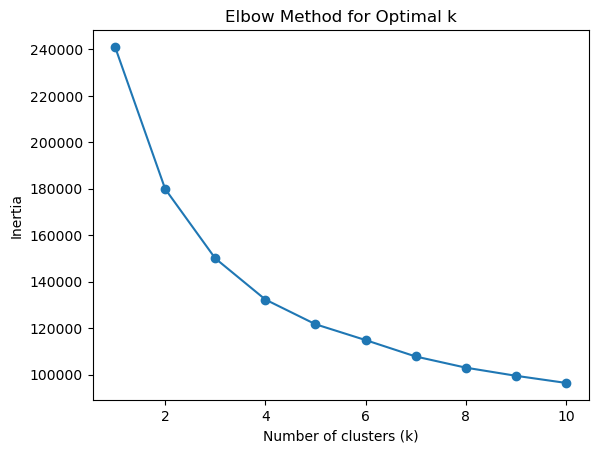

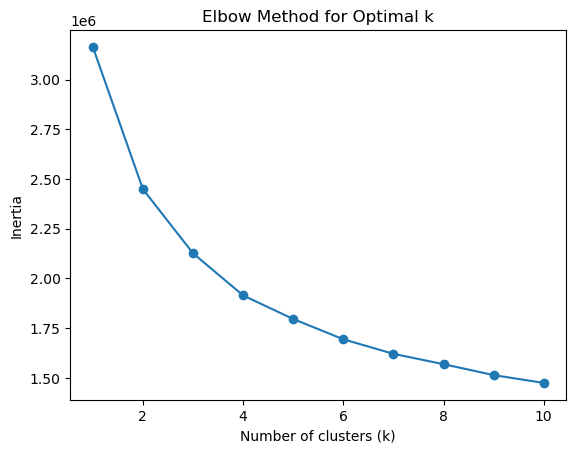

In [112]:
# subset
inertia = []
K_range = range(1, 11)


for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_TC)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# all cells
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

If anything, maybe 2 as the "elbow"

##### Silhouette Score

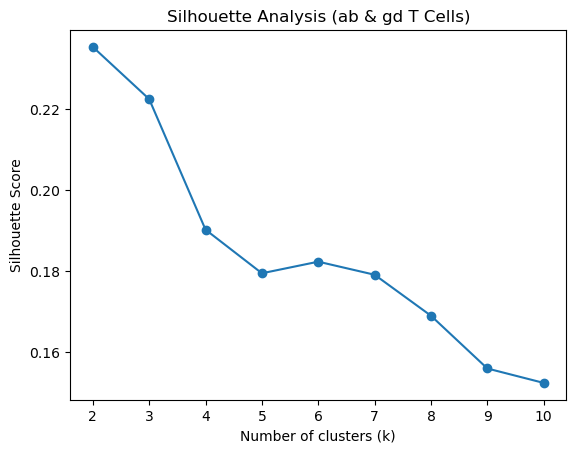

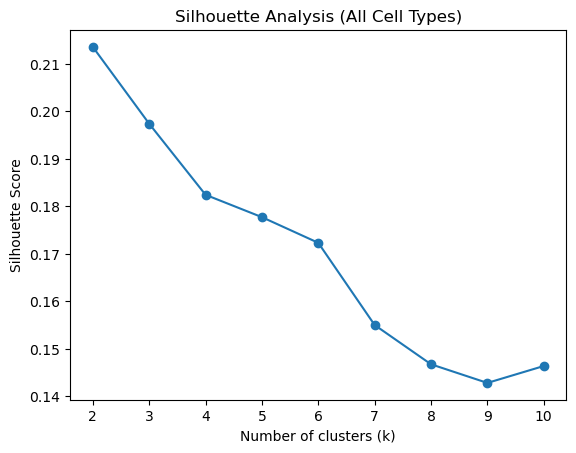

In [113]:
# subset
silscores_TC = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_TC = kmeans.fit_predict(scaled_TC)
    score_TC = silhouette_score(scaled_TC, labels_TC)
    silscores_TC.append(score_TC)

plt.plot(range(2, 11), silscores_TC, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis (ab & gd T Cells)')
plt.show()

# all cells
silscores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    silscores.append(score)

plt.plot(range(2, 11), silscores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis (All Cell Types)')
plt.show()


### Actual Clustering and Heatmap

/var/folders/bb/wtz1qdn10sz99v6ltwmxxx0c0000gn/T/ipykernel_1543/2522886434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_variance_peaks_TC['cluster'] = kmeans.fit_predict(scaled_TC)


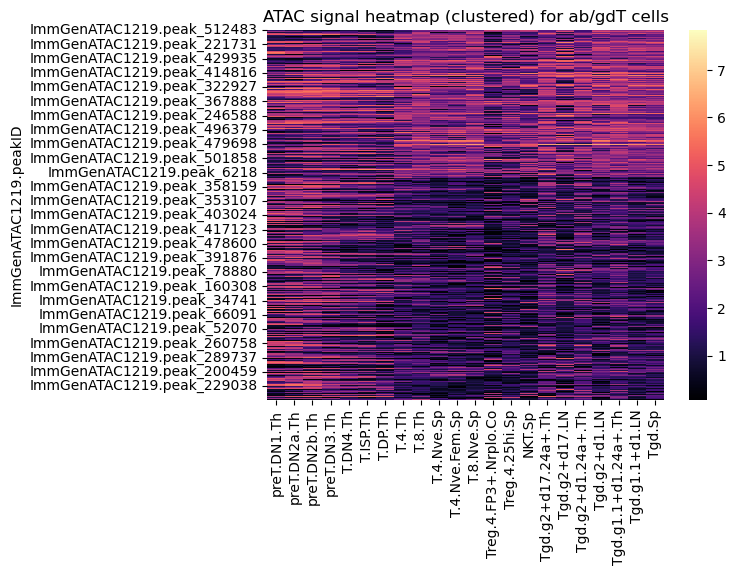

In [114]:
# subset
kmeans = KMeans(n_clusters=2, random_state=42)
high_variance_peaks_TC['cluster'] = kmeans.fit_predict(scaled_TC)

sorted_TC = high_variance_peaks_TC.sort_values('cluster')
sns.heatmap(sorted_TC.iloc[:, :-1], cmap='magma')
plt.title("ATAC signal heatmap (clustered) for ab/gdT cells")
plt.savefig("clustered_ATAC_peaks_TC.png")
plt.show()



cluster of peaks: 
1 --> more accessible in late differentiation
2 --> 

/var/folders/bb/wtz1qdn10sz99v6ltwmxxx0c0000gn/T/ipykernel_1543/1826635009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_variance_peaks['cluster'] = kmeans.fit_predict(scaled)


Text(0.5, 1.0, 'ATAC signal heatmap (clustered)')

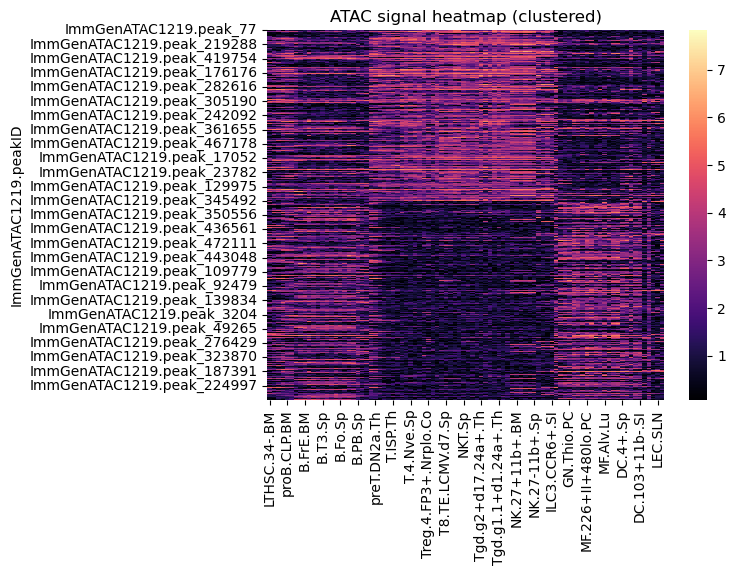

In [115]:
#all cells 
kmeans = KMeans(n_clusters=2, random_state=42)
high_variance_peaks['cluster'] = kmeans.fit_predict(scaled)

sorted_df = high_variance_peaks.sort_values('cluster')
sns.heatmap(sorted_df.iloc[:, :-1], cmap='magma')
plt.title("ATAC signal heatmap (clustered)")

peak clusters differ in accessibility in T and NK vs in other cells (Stem/Prog, myeloid etc.).

In [116]:
print("Peaks active in early differentiation of T cells:")
early_diff_peaks_TC = high_variance_peaks_TC[high_variance_peaks_TC['cluster'] == 0].index.tolist()
print(early_diff_peaks_TC)
print("Peaks active in late differentiation of T cells:")
late_diff_peaks_TC = high_variance_peaks_TC[high_variance_peaks_TC['cluster'] == 1].index.tolist()
print(late_diff_peaks_TC)

print("Peaks active in T and NK cells:")
peaks_TNK = high_variance_peaks[high_variance_peaks['cluster'] == 0].index.tolist()
print(peaks_TNK)
print("Peaks active in B, myeloid, Progenitor, Stem Cells, etc. ")
peaks_other = high_variance_peaks[high_variance_peaks['cluster'] == 1].index.tolist()
print(peaks_other)


Peaks active in early differentiation of T cells:
['ImmGenATAC1219.peak_83', 'ImmGenATAC1219.peak_302', 'ImmGenATAC1219.peak_310', 'ImmGenATAC1219.peak_408', 'ImmGenATAC1219.peak_446', 'ImmGenATAC1219.peak_645', 'ImmGenATAC1219.peak_759', 'ImmGenATAC1219.peak_802', 'ImmGenATAC1219.peak_1149', 'ImmGenATAC1219.peak_1157', 'ImmGenATAC1219.peak_1470', 'ImmGenATAC1219.peak_1593', 'ImmGenATAC1219.peak_2085', 'ImmGenATAC1219.peak_2105', 'ImmGenATAC1219.peak_2134', 'ImmGenATAC1219.peak_2164', 'ImmGenATAC1219.peak_2175', 'ImmGenATAC1219.peak_2200', 'ImmGenATAC1219.peak_2287', 'ImmGenATAC1219.peak_2350', 'ImmGenATAC1219.peak_2412', 'ImmGenATAC1219.peak_2530', 'ImmGenATAC1219.peak_2532', 'ImmGenATAC1219.peak_2536', 'ImmGenATAC1219.peak_2634', 'ImmGenATAC1219.peak_2652', 'ImmGenATAC1219.peak_2653', 'ImmGenATAC1219.peak_2931', 'ImmGenATAC1219.peak_3615', 'ImmGenATAC1219.peak_3703', 'ImmGenATAC1219.peak_3841', 'ImmGenATAC1219.peak_3945', 'ImmGenATAC1219.peak_3971', 'ImmGenATAC1219.peak_4152', 'ImmGe

In [117]:
# clustering and heatmap of peaks in TNK cluster with focus on T cell subset

kmeans = KMeans(n_clusters=2, random_state=42)
peaks_TNK_df = high_variance_peaks.loc[peaks_TNK]

peaks_TNK_df['cluster'] = kmeans.fit_predict(scaled)

sorted_TNK = high_variance_peaks.sort_values('cluster')
sns.heatmap(sorted_df.iloc[:, :-4], cmap='magma')
plt.title("ATAC signal heatmap (clustered)")

ValueError: Length of values (35169) does not match length of index (16210)

In [ ]:
info_early_diff_TC = ATAC_dis.loc[early_diff_peaks_TC]
info_late_diff_TC = ATAC_dis.loc[late_diff_peaks_TC]

##### Identity of Peaks within Clusters

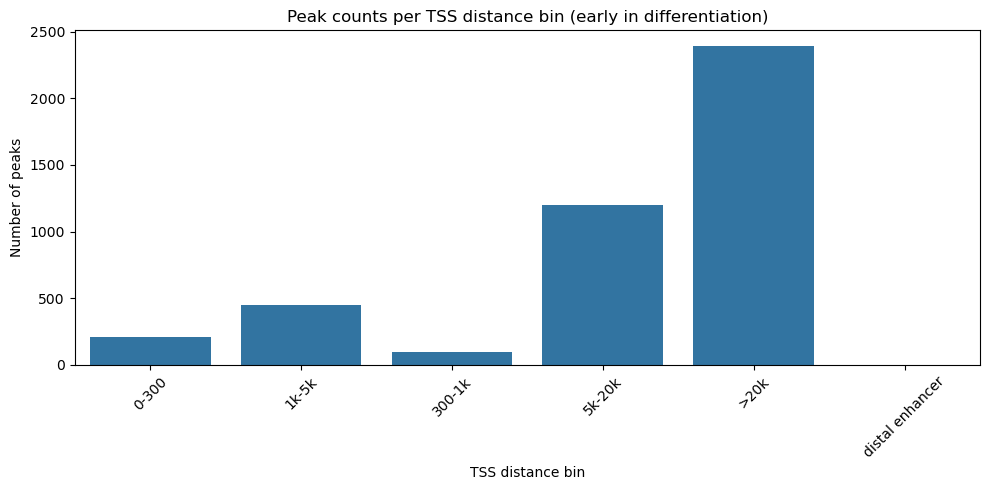

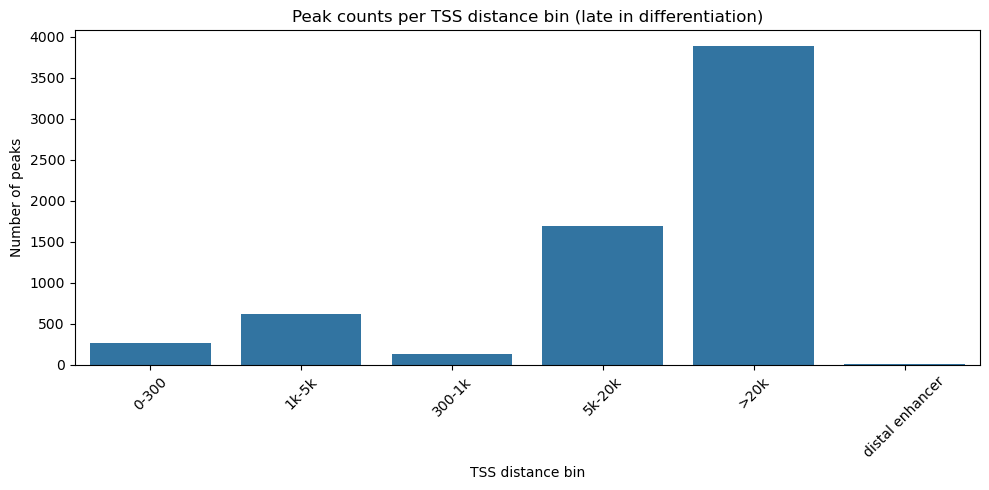

In [ ]:
info_early_diff_TC

plt.figure(figsize=(10, 5))
sns.countplot(data=info_early_diff_TC, x='TSS_bin', order=sorted(info_early_diff_TC['TSS_bin'].unique()))
plt.xticks(rotation=45)
plt.title("Peak counts per TSS distance bin (early in differentiation)")
plt.xlabel("TSS distance bin")
plt.ylabel("Number of peaks")
plt.tight_layout()
plt.show()

info_late_diff_TC
plt.figure(figsize=(10, 5))
sns.countplot(data=info_late_diff_TC, x='TSS_bin', order=sorted(info_late_diff_TC['TSS_bin'].unique()))
plt.xticks(rotation=45)
plt.title("Peak counts per TSS distance bin (late in differentiation)")
plt.xlabel("TSS distance bin")
plt.ylabel("Number of peaks")
plt.tight_layout()
plt.show()

mostly enhancers (over 300bp from TSS), even 

## UMAP and leiden Clustering of significant Peaks

#### TC Subset Dimension Reduction

In [ ]:
# umap embedding
umap_model_TC = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)

# just use numeric data for UMAP
data_TC = high_variance_peaks_TC.select_dtypes(include=['number']).dropna()

# exclude metadata columns for embedding
umap_embedding_TC = umap_model_TC.fit_transform(data_TC)  

# Create a DataFrame for the UMAP embedding
data_red_TC = pd.DataFrame(umap_embedding_TC, columns=['UMAP1', 'UMAP2'])




/opt/miniconda3/envs/dataanalysisenv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


##### Leiden Clustering of Dim Red Data

/opt/miniconda3/envs/dataanalysisenv/lib/python3.13/site-packages/anndata/utils.py:311: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


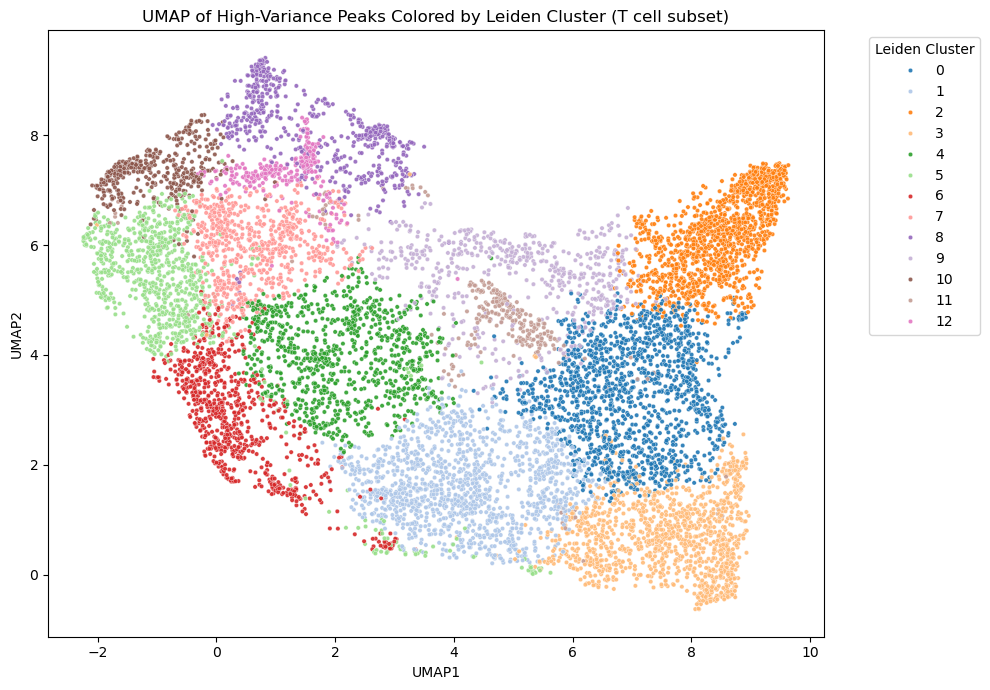

Silhouette Score: 0.129


In [ ]:
# AnnData object
adata = ad.AnnData(data_TC)

# Compute neighbors and run Leiden clustering
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
sc.tl.leiden(adata, resolution=1.0)  # adjust resolution as needed

# Add the Leiden cluster labels to your UMAP DataFrame
data_red_TC['leiden'] = adata.obs['leiden'].values

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='UMAP1', y='UMAP2', 
    hue='leiden',
    data=data_red_TC, 
    palette='tab20', 
    s=10, alpha=0.9
)
plt.title('UMAP of High-Variance Peaks Colored by Leiden Cluster (T cell subset)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Leiden Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('leiden_peaks_TC.png', )
plt.show()

score_TC = silhouette_score(data_TC, data_red_TC['leiden'])
print(f"Silhouette Score: {score_TC:.3f}")


#### Was Laila gemacht hat

In [ ]:
print(list(ATAC_dis.columns))
score_cols_all = list(data['norm_scores'].columns)
print(score_cols_all)

['chrom', 'Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27+11b-.BM', 'NK.27

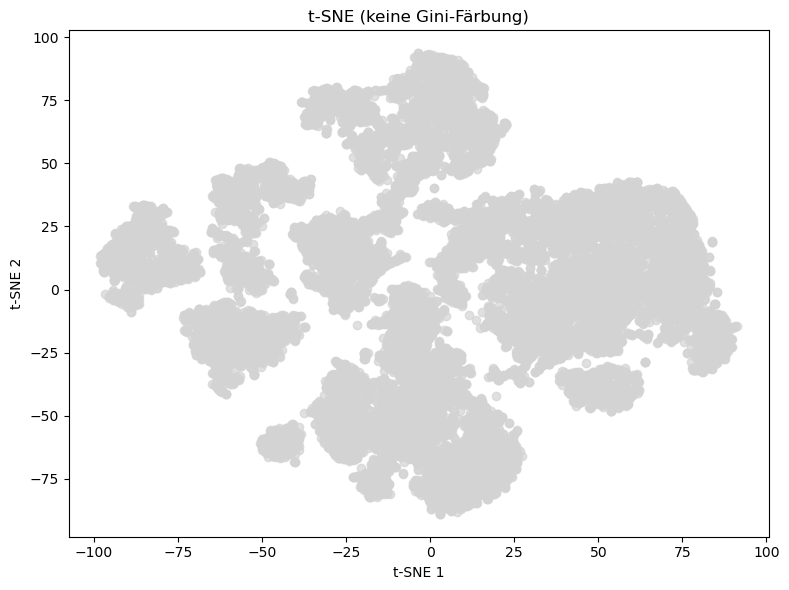

In [ ]:
N = 20000
top_peaks_idx = ATAC_dis['variability'].sort_values(ascending=False).head(N).index
#top_peaks_matrix = ATAC_dis.loc[top_peaks_idx, :]

# 4. TSS-Distanz für diese Peaks holen (matching Index!)
tss_distances = ATAC_dis.loc[top_peaks_idx, 'distance_to_TSS'].values

# 5. tSNE anwenden
coords = functions.tSNE(ATAC_dis, score_cols_all, 25, 30, top_peaks_idx)[0]

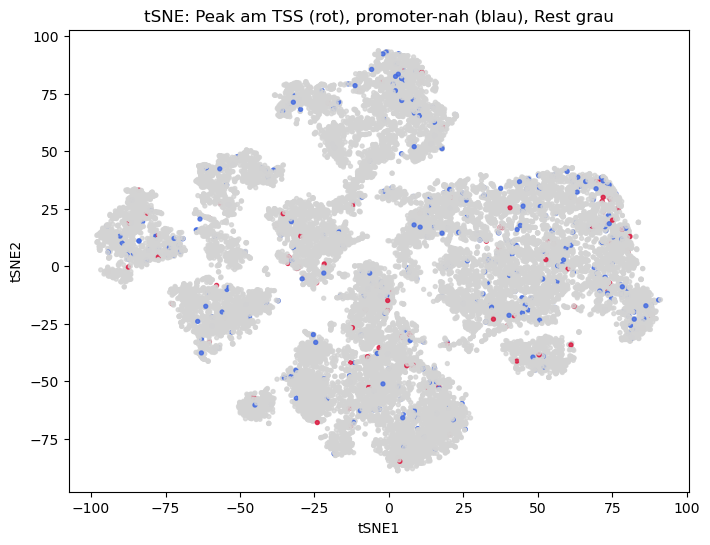

In [ ]:
tss_names = ATAC_dis.loc[coords.index, 'TSS']
colors = np.full_like(tss_distances, fill_value='lightgrey', dtype='object')

# ROT: Peak direkt am TSS (dort, wo 'TSS' NICHT NaN ist)
colors[~pd.isna(tss_names)] = 'crimson'

# BLAU: 0 < Distanz <= 2000, aber KEIN direkter TSS (also TSS ist NaN)
mask_blue = (tss_distances > 0) & (tss_distances <= 2000) & (pd.isna(tss_names))
colors[mask_blue] = 'royalblue'

plt.figure(figsize=(8,6))
plt.scatter(coords['tSNE1'], coords['tSNE2'], c=colors, s=8, alpha=0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('tSNE: Peak am TSS (rot), promoter-nah (blau), Rest grau')
plt.show()

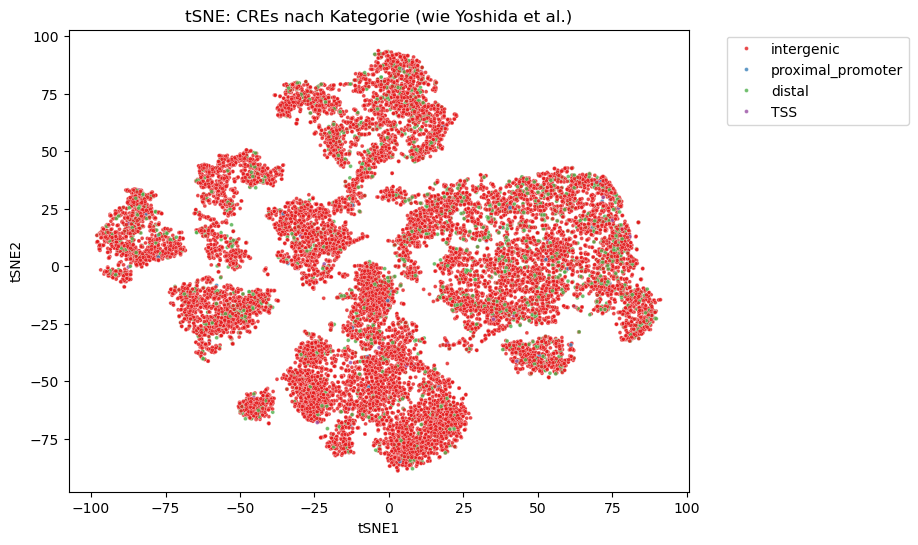

In [ ]:
bins = [
    (-np.inf, 0),         # direkt am/im TSS
    (0, 500),             # promoter-proximal
    (500, 2000),          # promoter-nah
    (2000, 10000),        # distal
    (10000, np.inf)       # weit weg
]
labels = ['TSS', 'proximal_promoter', 'promoter_near', 'distal', 'intergenic']

def cat(dist, tss):
    if not pd.isna(tss):
        if dist <= 0:
            return 'TSS'
        elif dist <= 500:
            return 'proximal_promoter'
        elif dist <= 2000:
            return 'promoter_near'
    if dist > 2000 and dist <= 10000:
        return 'distal'
    return 'intergenic'

categories = [cat(d, t) for d, t in zip(tss_distances, tss_names)]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=coords['tSNE1'], y=coords['tSNE2'],
    hue=categories, palette='Set1', s=8, alpha=0.8
)
plt.title('tSNE: CREs nach Kategorie (wie Yoshida et al.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

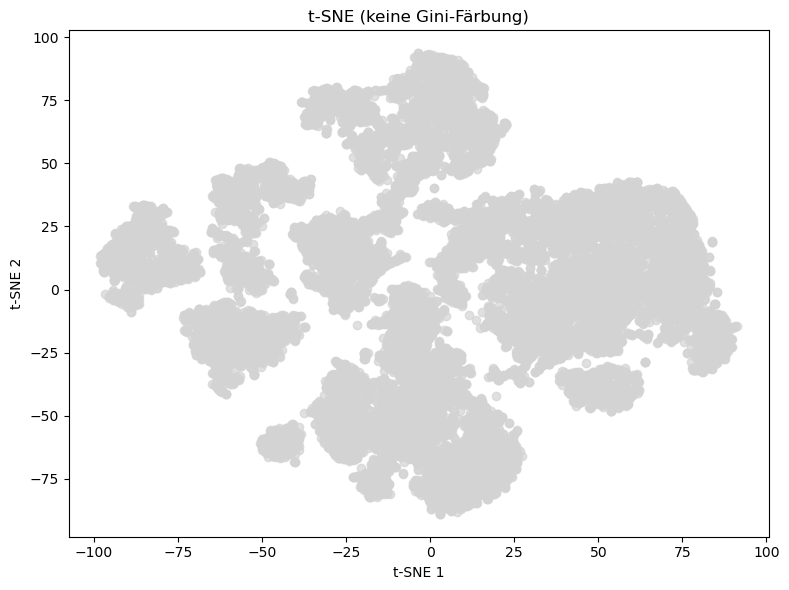

In [ ]:
ATAC_dis_prom1kb = ATAC_dis.copy()
ATAC_dis_prom1kb['region_type'] = np.where(ATAC_dis_prom1kb['distance_to_TSS'].abs() <= 1000, 'Promoter', 'Enhancer')
tsne_yosh, gini_score = functions.tSNE(ATAC_dis, score_cols_all, 25, 30, top_peaks_idx)

ValueError: 'c' argument has 90 elements, which is inconsistent with 'x' and 'y' with size 20000.

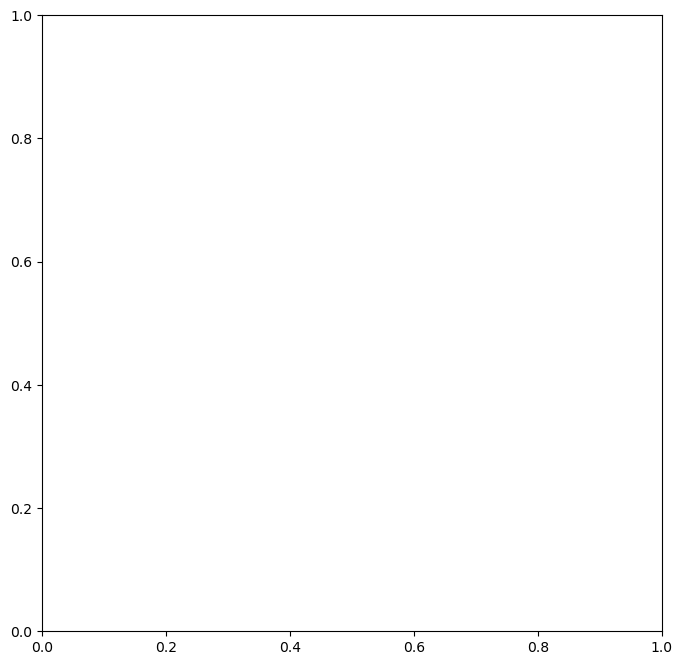

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(tsne_yosh['tSNE1'], tsne_yosh['tSNE2'], c=gini_score, cmap='Spectral', s=4)
plt.colorbar(label="Gini index\n(Cell-type specificity)")
plt.title('tSNE: CREs nach Gini-Index (Yoshida-Style)')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()